# Exploratory Data Analysis (EDA)

In [130]:
# Imported necessary libraries
import pandas as pd


# Loaded the dataset
engine_df=pd.read_csv(r"C:\Users\user\Downloads\Data Science\aircraft_engine_maintenance.csv")

# Displayed the first few rows of the dataset
engine_df.head()


,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2021-01-01 00:00:00,491.953274,NaN,2801.303972,NaN,0
1,1,1,2021-01-01 12:30:00,567.414022,129.808855,2835.028192,1.619966,0
2,2,1,2021-01-02 01:00:00,552.161384,124.822135,3257.107364,1.665153,0
3,3,1,2021-01-02 13:30:00,NaN,117.691465,3038.128929,NaN,0
4,4,1,2021-01-03 02:00:00,NaN,129.560121,3018.402598,NaN,0


In [131]:
engine_df.columns

Index(['Unnamed: 0', 'Engine_ID', 'Timestamp', 'Temperature', 'Pressure',
       'Rotational_Speed', 'Engine_Health', 'Engine_Failure'],
      dtype='object')

In [132]:
len(engine_df)

10505

In [133]:
engine_df['Engine_ID'].value_counts() 

Engine_ID
1    2101
2    2101
3    2101
4    2101
5    2101
Name: count, dtype: int64

In [134]:
engine_df['Engine_Failure'].value_counts() 

Engine_Failure
0    9794
1     711
Name: count, dtype: int64

#### Data Cleaning
1. Handling Missing Values:

In [135]:
engine_df.isnull()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...
10500,False,False,False,False,False,False,False,False
10501,False,False,False,False,False,False,False,False
10502,False,False,False,True,False,False,True,False
10503,False,False,False,False,False,False,False,False


In [136]:
# Checked for missing values
engine_df.isnull().sum()

Unnamed: 0             0
Engine_ID              0
Timestamp              0
Temperature          490
Pressure             537
Rotational_Speed     522
Engine_Health       1010
Engine_Failure         0
dtype: int64

In [137]:
# Displayed columns with missing values
engine_df['Temperature']

0        491.953274
1        567.414022
2        552.161384
3               NaN
4               NaN
            ...    
10500    476.847716
10501    440.494330
10502           NaN
10503    581.269776
10504    503.320885
Name: Temperature, Length: 10505, dtype: float64

In [138]:
missing_values=engine_df.isnull().sum()
missing_values[missing_values>0].index

Index(['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health'], dtype='object')

In [139]:
missing_values=engine_df.isnull().sum()
missing_values[missing_values>0].index
missing_columns=missing_values[missing_values>0].index
missing_columns

Index(['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health'], dtype='object')

In [140]:
# Introduce missing values(replace the missing values with some methods of central tendency: mean/median)

engine_df.fillna(engine_df[missing_columns].mean(), inplace=True)

# Set a seed for reproducibility


# Randomly select indices to introduce missing values


# Introduce missing values in the selected indices for "Temperature" and "Pressure"


# Display the dataset with missing values



In [141]:
engine_df

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0
1,1,1,2021-01-01 12:30:00,567.414022,129.808855,2835.028192,1.619966,0
2,2,1,2021-01-02 01:00:00,552.161384,124.822135,3257.107364,1.665153,0
3,3,1,2021-01-02 13:30:00,499.829973,117.691465,3038.128929,1.397576,0
4,4,1,2021-01-03 02:00:00,499.829973,129.560121,3018.402598,1.397576,0
...,...,...,...,...,...,...,...,...
10500,10500,5,2023-12-28 16:00:00,476.847716,132.820792,2893.279870,1.105070,0
10501,10501,5,2023-12-29 04:30:00,440.494330,105.342947,2971.973324,1.400521,0
10502,10502,5,2023-12-29 17:00:00,499.829973,117.517511,2917.398994,1.397576,0
10503,10503,5,2023-12-30 05:30:00,581.269776,142.853142,3230.471424,1.735149,0


In [142]:
# Check for missing values
engine_df.isnull().sum()

Unnamed: 0          0
Engine_ID           0
Timestamp           0
Temperature         0
Pressure            0
Rotational_Speed    0
Engine_Health       0
Engine_Failure      0
dtype: int64

In [143]:
# Display columns with missing values
missing_values=engine_df.isnull().sum()
missing_values[missing_values>0].index

Index([], dtype='object')

2. Handling Outliers:

In [144]:
# Calculate IQR for each column
columns_to_check=engine_df[['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health']]
Q3=columns_to_check.quantile(0.75)
Q3

Temperature          530.639835
Pressure             128.941962
Rotational_Speed    3127.412135
Engine_Health          1.545940
Name: 0.75, dtype: float64

In [145]:
columns_to_check=engine_df[['Temperature', 'Pressure', 'Rotational_Speed', 'Engine_Health']]
Q1=columns_to_check.quantile(0.25)
Q1

Temperature          468.989918
Pressure             111.129590
Rotational_Speed    2874.087481
Engine_Health          1.250840
Name: 0.25, dtype: float64

In [146]:
# Identify outliers using IQR
IQR=Q3-Q1
IQR

Temperature          61.649917
Pressure             17.812372
Rotational_Speed    253.324654
Engine_Health         0.295101
dtype: float64

In [147]:
outliers=((columns_to_check<(Q1-1.5*IQR)) | (columns_to_check>(Q3+1.5*IQR))).any(axis=1)
outliers

0        False
1        False
2        False
3        False
4        False
         ...  
10500    False
10501    False
10502    False
10503    False
10504    False
Length: 10505, dtype: bool

In [148]:
# Display the number of outliers
engine_df[outliers]

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
44,44,1,2021-01-23 22:00:00,370.913041,78.304387,2931.295646,1.217130,0
123,123,1,2021-03-06 01:30:00,355.981428,100.295958,2706.891168,1.302672,0
174,174,1,2021-04-01 15:00:00,553.515771,142.493526,3636.686784,1.800130,0
177,177,1,2021-04-03 04:30:00,578.490599,132.107362,2789.782811,1.990961,0
309,309,1,2021-06-10 22:30:00,372.108814,108.447542,3152.587542,1.249401,0
...,...,...,...,...,...,...,...,...
10310,10310,5,2023-09-20 17:00:00,495.131125,108.620766,2481.344907,1.196934,0
10367,10367,5,2023-10-20 09:30:00,414.342339,83.087994,3275.703160,0.948484,0
10388,10388,5,2023-10-31 08:00:00,481.866975,106.143293,3528.295060,0.894677,0
10423,10423,5,2023-11-18 13:30:00,385.460414,78.518629,3289.352741,0.976141,0


In [149]:
outliers=((columns_to_check<(Q1-1.5*IQR)) | (columns_to_check>(Q3+1.5*IQR))).sum()
outliers

Temperature         131
Pressure            137
Rotational_Speed    115
Engine_Health       144
dtype: int64

In [154]:
# Remove outliers based on IQR: to do this, I negated the command for the already established outliers
engine_df=engine_df[~outliers]


KeyError: "None of [Index([-132, -138, -116, -145], dtype='int64')] are in the [columns]"

In [155]:
# Display the dataset after handling outliers
engine_df

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0
1,1,1,2021-01-01 12:30:00,567.414022,129.808855,2835.028192,1.619966,0
2,2,1,2021-01-02 01:00:00,552.161384,124.822135,3257.107364,1.665153,0
3,3,1,2021-01-02 13:30:00,499.829973,117.691465,3038.128929,1.397576,0
4,4,1,2021-01-03 02:00:00,499.829973,129.560121,3018.402598,1.397576,0
...,...,...,...,...,...,...,...,...
10500,10500,5,2023-12-28 16:00:00,476.847716,132.820792,2893.279870,1.105070,0
10501,10501,5,2023-12-29 04:30:00,440.494330,105.342947,2971.973324,1.400521,0
10502,10502,5,2023-12-29 17:00:00,499.829973,117.517511,2917.398994,1.397576,0
10503,10503,5,2023-12-30 05:30:00,581.269776,142.853142,3230.471424,1.735149,0


3. Ensuring Data Consistency:

In [156]:
# Check data consistency and integrity (e.g., ensure timestamps are in order)
engine_df.sort_values(by='Timestamp', inplace=True)

In [157]:
engine_df.head(30)

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0
6303,6303,4,2021-01-01 00:00:00,505.570432,125.381735,3076.101970,1.397839,1
4202,4202,3,2021-01-01 00:00:00,454.812683,115.522981,2823.933642,1.219232,0
2101,2101,2,2021-01-01 00:00:00,515.077480,119.945267,2790.832119,1.397576,0
8404,8404,5,2021-01-01 00:00:00,541.184456,119.543472,3300.346426,1.582894,0
6304,6304,4,2021-01-01 12:30:00,522.398252,120.273729,2832.181271,1.896961,0
2102,2102,2,2021-01-01 12:30:00,518.098019,134.673669,2667.724790,1.593889,0
1,1,1,2021-01-01 12:30:00,567.414022,129.808855,2835.028192,1.619966,0
8405,8405,5,2021-01-01 12:30:00,501.726213,125.358999,2731.333839,1.272189,0
4203,4203,3,2021-01-01 12:30:00,561.112862,131.390238,3050.255089,1.514231,0


In [158]:
# Display the cleaned dataset

engine_df.head()

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0
6303,6303,4,2021-01-01 00:00:00,505.570432,125.381735,3076.101970,1.397839,1
4202,4202,3,2021-01-01 00:00:00,454.812683,115.522981,2823.933642,1.219232,0
2101,2101,2,2021-01-01 00:00:00,515.077480,119.945267,2790.832119,1.397576,0
8404,8404,5,2021-01-01 00:00:00,541.184456,119.543472,3300.346426,1.582894,0


#### Data Exploration

1. Univariate Analysis:

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


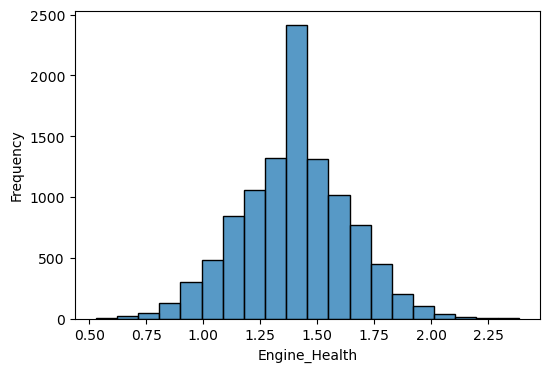

In [160]:
# Univariate analysis - Histograms

# Distribution of Engine Health
fig=plt.figure(figsize=(6,4))
sns.histplot(engine_df['Engine_Health'], bins=20)
plt.xlabel('Engine_Health')
plt.ylabel('Frequency')
plt.show()

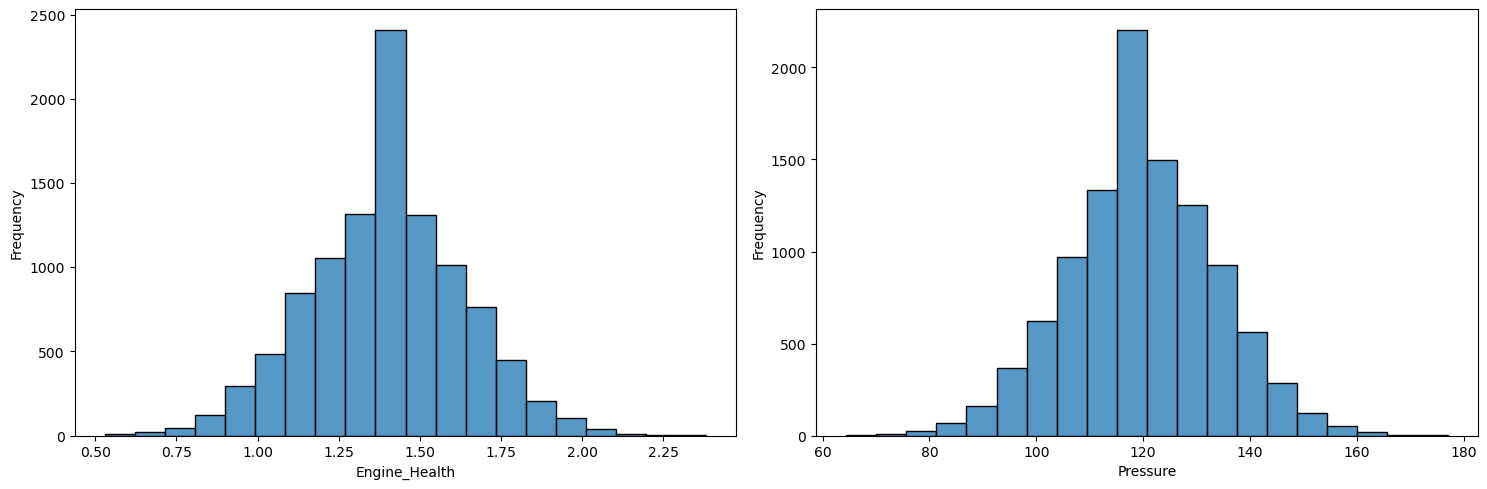

In [161]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.histplot(engine_df['Engine_Health'], bins=20)
plt.xlabel('Engine_Health')
plt.ylabel('Frequency')

#fig=plt.figure(figsize=(6,4))
plt.subplot(1,2,2)
sns.histplot(engine_df['Pressure'], bins=20)
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_14876\2001044505.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14876\2001044505.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14876\2001044505.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


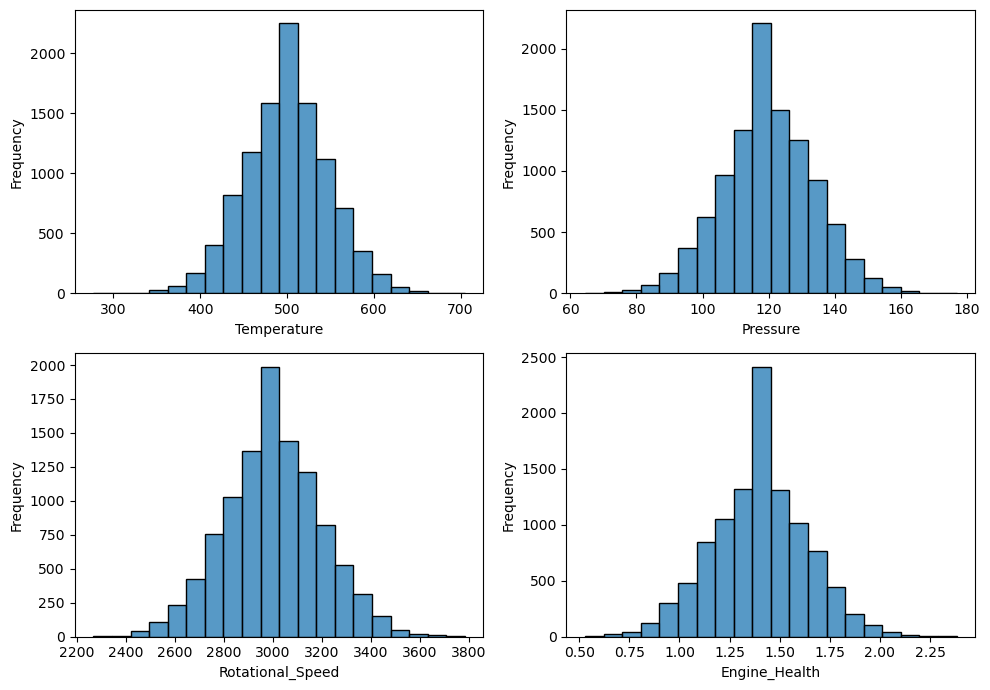

In [162]:
fig=plt.figure(figsize=(10,7))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2,2,i)
    sns.histplot(engine_df[column],bins=20) 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.tight_layout()

### Narration
The features analysed were: Temperature,Pressure,Rotational_Speed,Engine_Health and Engine_Failure which were marked on the X-axis. The Univariate analysis revealed a reoccuring Peak period at the mid range of the day. Further analysi will be carried out to determine the conclsion for this constant rise in frequency.

2. Bivariate Analysis:

In [163]:
# Bivariate analysis - Pairplot: selected use features
engine_df.head()
new_columns_to_check=['Temperature','Pressure','Rotational_Speed','Engine_Health','Engine_Failure']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


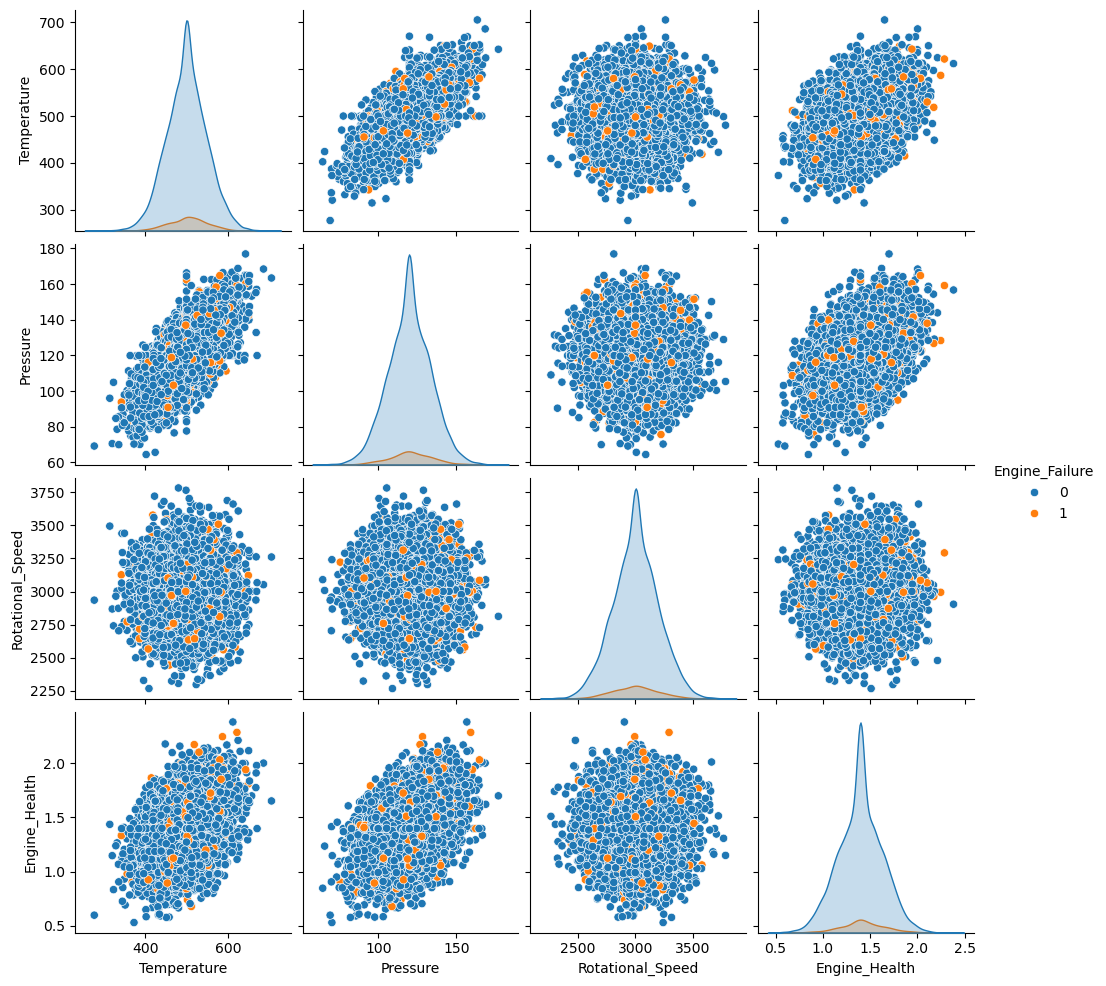

In [164]:
new_columns_to_check=['Temperature','Pressure','Rotational_Speed','Engine_Health','Engine_Failure']
sns.pairplot(engine_df[new_columns_to_check], hue='Engine_Failure');

### Observation

**Temperature and Pressure**: There is a linear progression with a an even spread along with an observation of possible engine failure

**Engine health and pressure**: Possiblity of engine failure increases as the the pressure increases

**Engine health and Temperature**:Possiblity of engine failure increases as the the temperature increases

**Rotational Speed**: Shows a spread with an increased possiblity for engine failure if the temperature and/or presure increases. Difficult to identify a pattern

3. Multivariate analysis

In [167]:
#correlation_table
correlation_table= columns_to_check.corr()
correlation_table

,Temperature,Pressure,Rotational_Speed,Engine_Health
Temperature,1.000000,0.673471,0.013538,0.385890
Pressure,0.673471,1.000000,0.003988,0.417722
Rotational_Speed,0.013538,0.003988,1.000000,0.001680
Engine_Health,0.385890,0.417722,0.001680,1.000000


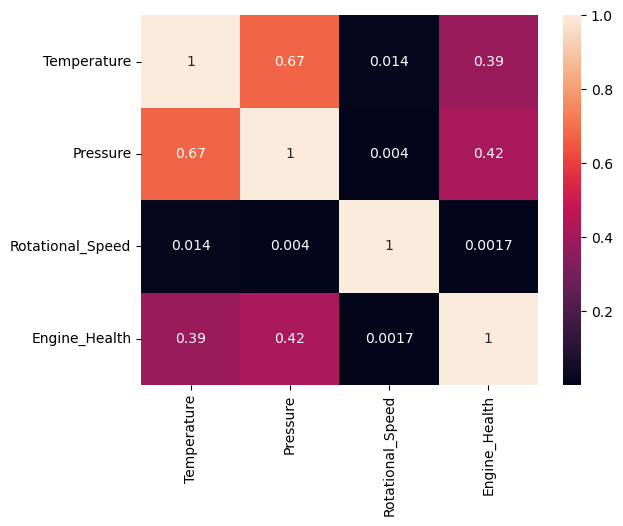

In [168]:
# Multivariate analysis - Correlation Heatmap
correlation_table= columns_to_check.corr()
sns.heatmap(correlation_table,annot=True);

### Observation

**Temperature and Pressure**: This show the highest correlation of about 67%. This confirms that there is a high possibility that the engine health is affected by the temperature an pressure.
Temperature and pressure affect all other features of the dataset to a considerable amount except from the rotional speed.
this implies that the rotional speed does not directly affect engine failure.

### Data visualization and Feature engineering
#### Time Series of Engine Health and Engine Failure

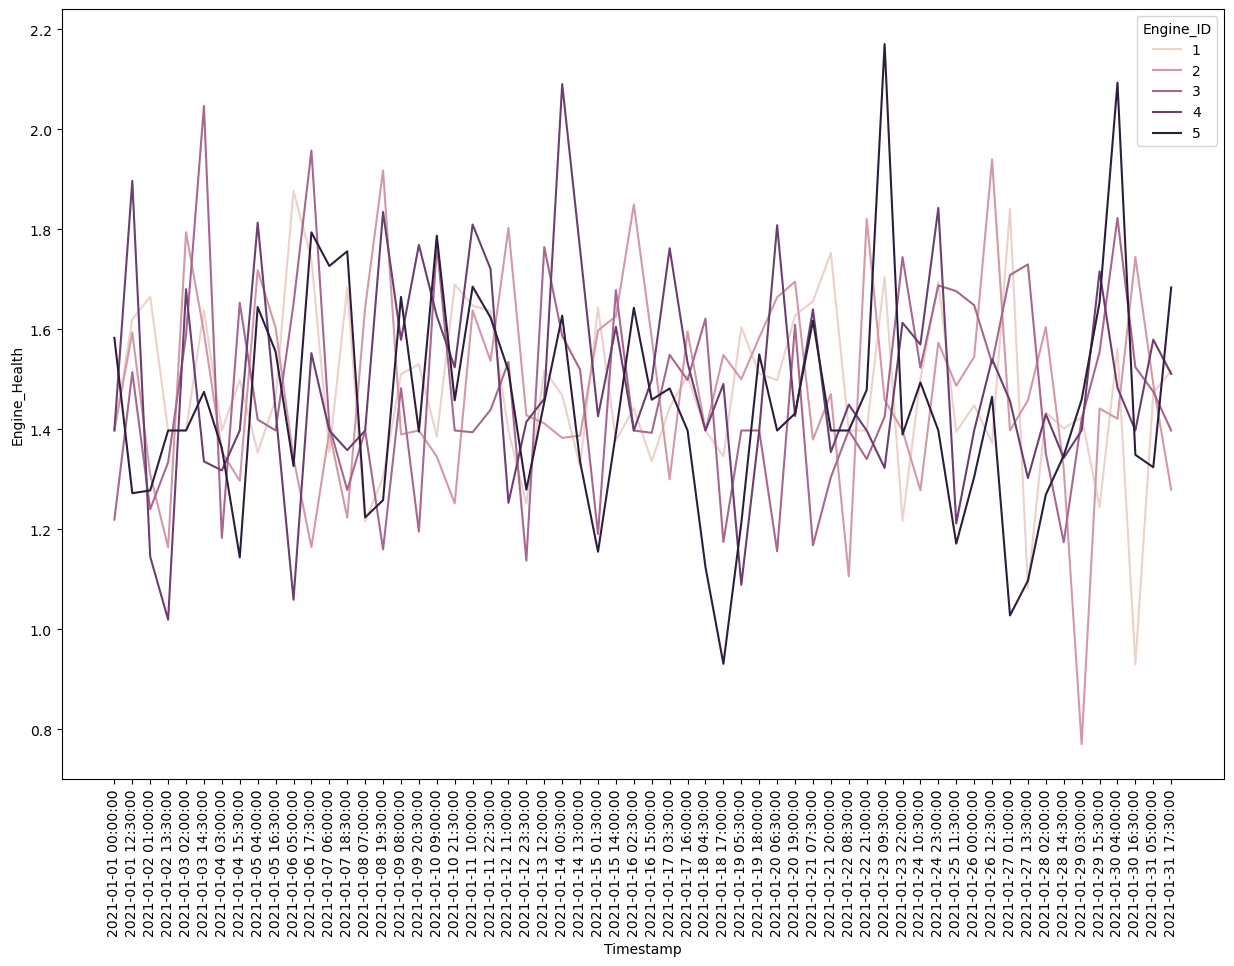

In [169]:
# Data visualization - Time Series of Engine Health and Engine Failure

plt.figure(figsize=(15,10))
sns.lineplot(x='Timestamp',y='Engine_Health',data=engine_df[:300], hue='Engine_ID')
plt.xticks(rotation=90)
plt.show()

##### Feature engineering 

In [170]:
# Feature engineering - First, let's convert the timestamp column to a datetime data type.

engine_df['Timestamp']=pd.to_datetime(engine_df['Timestamp'])
engine_df['Timestamp']

0       2021-01-01 00:00:00
6303    2021-01-01 00:00:00
4202    2021-01-01 00:00:00
2101    2021-01-01 00:00:00
8404    2021-01-01 00:00:00
                ...        
6302    2023-12-30 18:00:00
4201    2023-12-30 18:00:00
2100    2023-12-30 18:00:00
8403    2023-12-30 18:00:00
10504   2023-12-30 18:00:00
Name: Timestamp, Length: 10505, dtype: datetime64[ns]

In [171]:
# Time-related Features
engine_df['Month_of_year']=engine_df['Timestamp'].dt.month_name()
engine_df['Day_of_Week']=engine_df['Timestamp'].dt.day_name()
engine_df['Year']=engine_df['Timestamp'].dt.year
engine_df['Hour_of_day']=engine_df['Timestamp'].dt.hour

In [172]:
engine_df

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Month_of_year,Day_of_Week,Year,Hour_of_day
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0,January,Friday,2021,0
6303,6303,4,2021-01-01 00:00:00,505.570432,125.381735,3076.101970,1.397839,1,January,Friday,2021,0
4202,4202,3,2021-01-01 00:00:00,454.812683,115.522981,2823.933642,1.219232,0,January,Friday,2021,0
2101,2101,2,2021-01-01 00:00:00,515.077480,119.945267,2790.832119,1.397576,0,January,Friday,2021,0
8404,8404,5,2021-01-01 00:00:00,541.184456,119.543472,3300.346426,1.582894,0,January,Friday,2021,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6302,6302,3,2023-12-30 18:00:00,468.202904,103.294138,2759.012726,1.123990,1,December,Saturday,2023,18
4201,4201,2,2023-12-30 18:00:00,497.909259,136.980731,3001.051616,1.506987,1,December,Saturday,2023,18
2100,2100,1,2023-12-30 18:00:00,478.704044,124.621562,2825.630518,1.557776,0,December,Saturday,2023,18
8403,8403,4,2023-12-30 18:00:00,484.842883,121.757481,3214.435415,1.776111,0,December,Saturday,2023,18


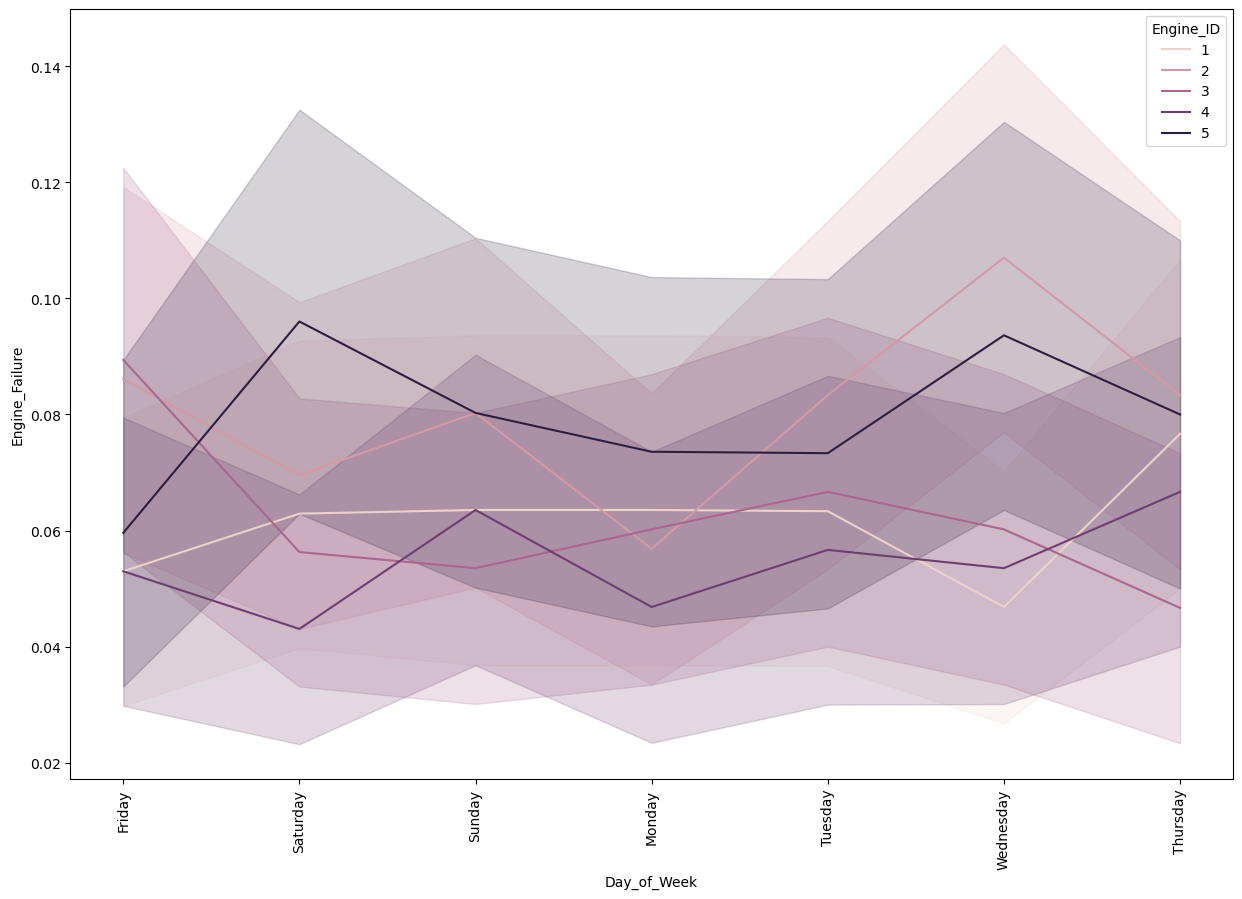

In [173]:

plt.figure(figsize=(15,10))
sns.lineplot(x='Day_of_Week',y='Engine_Failure',data=engine_df, hue='Engine_ID')
plt.xticks(rotation=90)
plt.show()

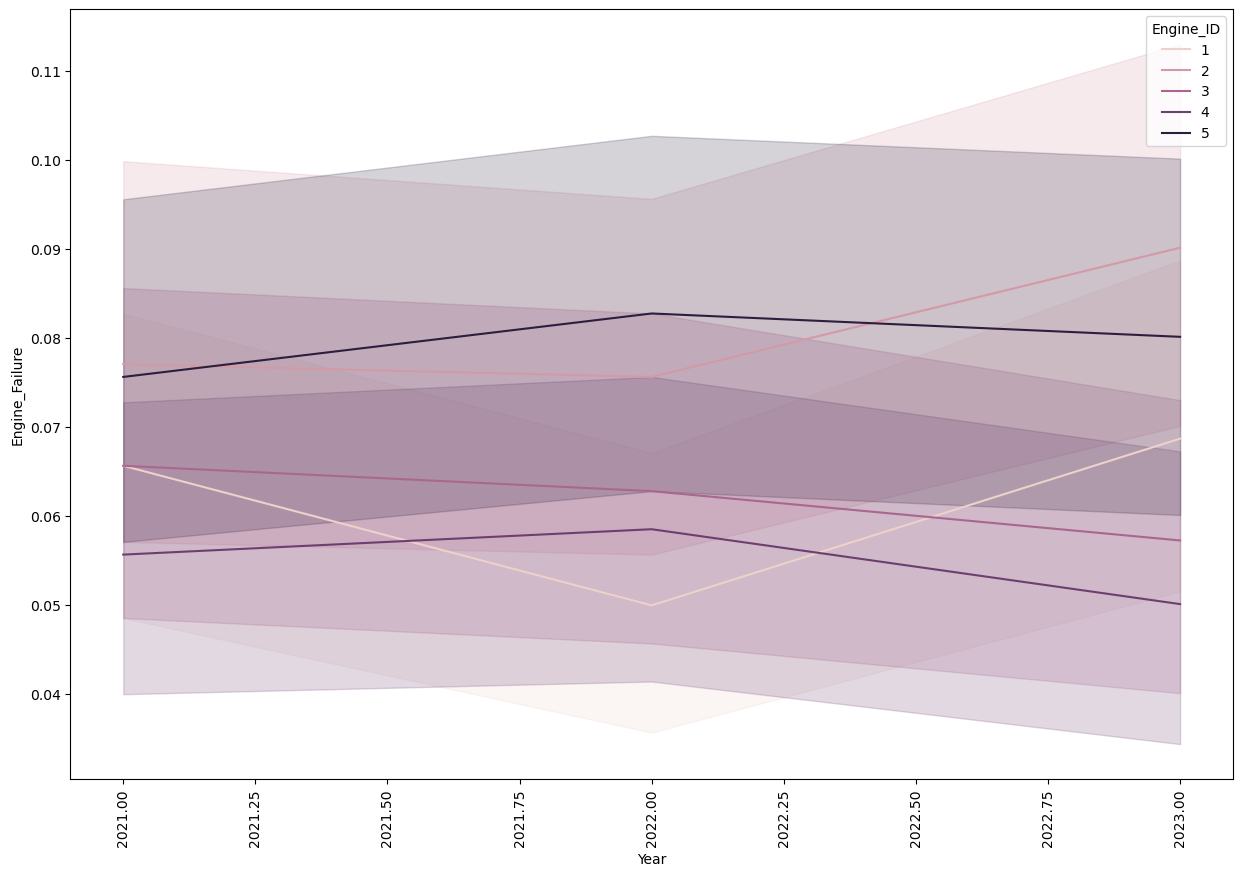

In [174]:

plt.figure(figsize=(15,10))
sns.lineplot(x='Year',y='Engine_Failure',data=engine_df, hue='Engine_ID')
plt.xticks(rotation=90)
plt.show()

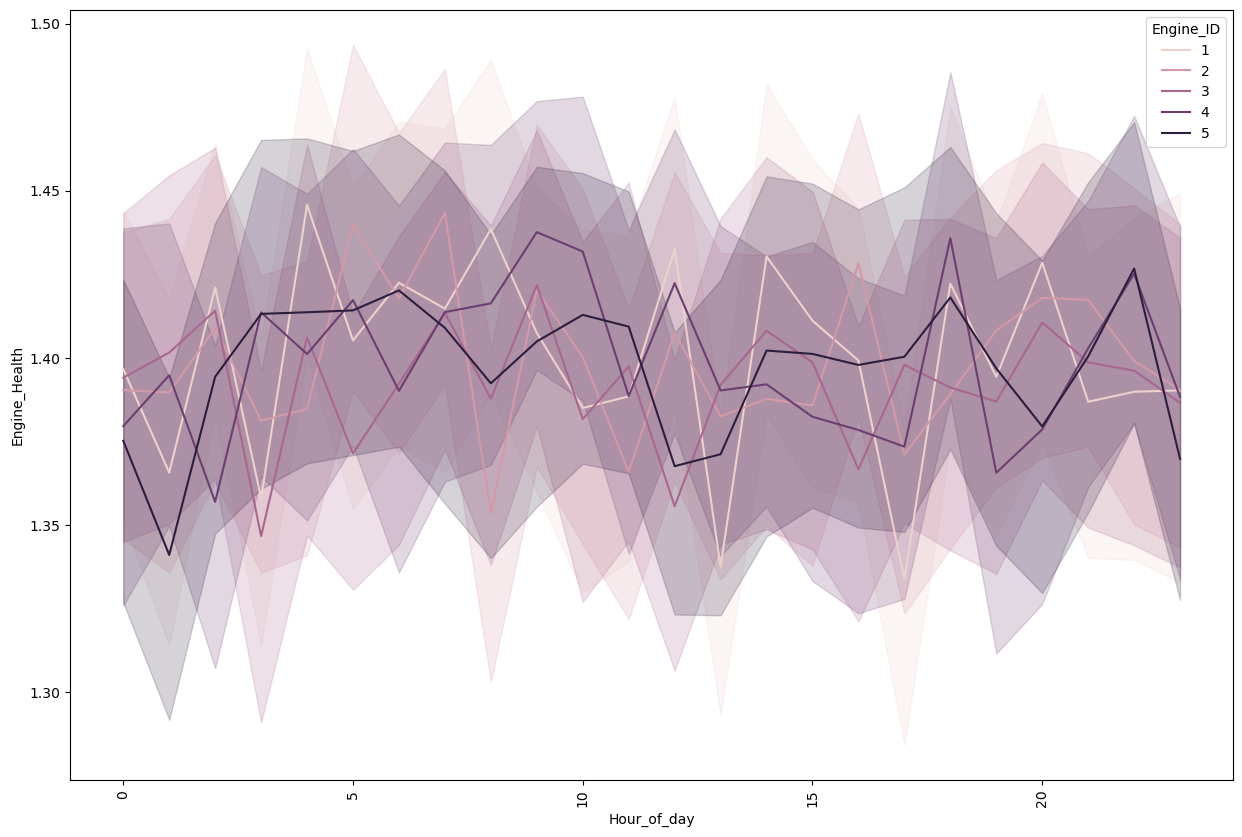

In [175]:

plt.figure(figsize=(15,10))
sns.lineplot(x='Hour_of_day',y='Engine_Health',data=engine_df, hue='Engine_ID')
plt.xticks(rotation=90)
plt.show()

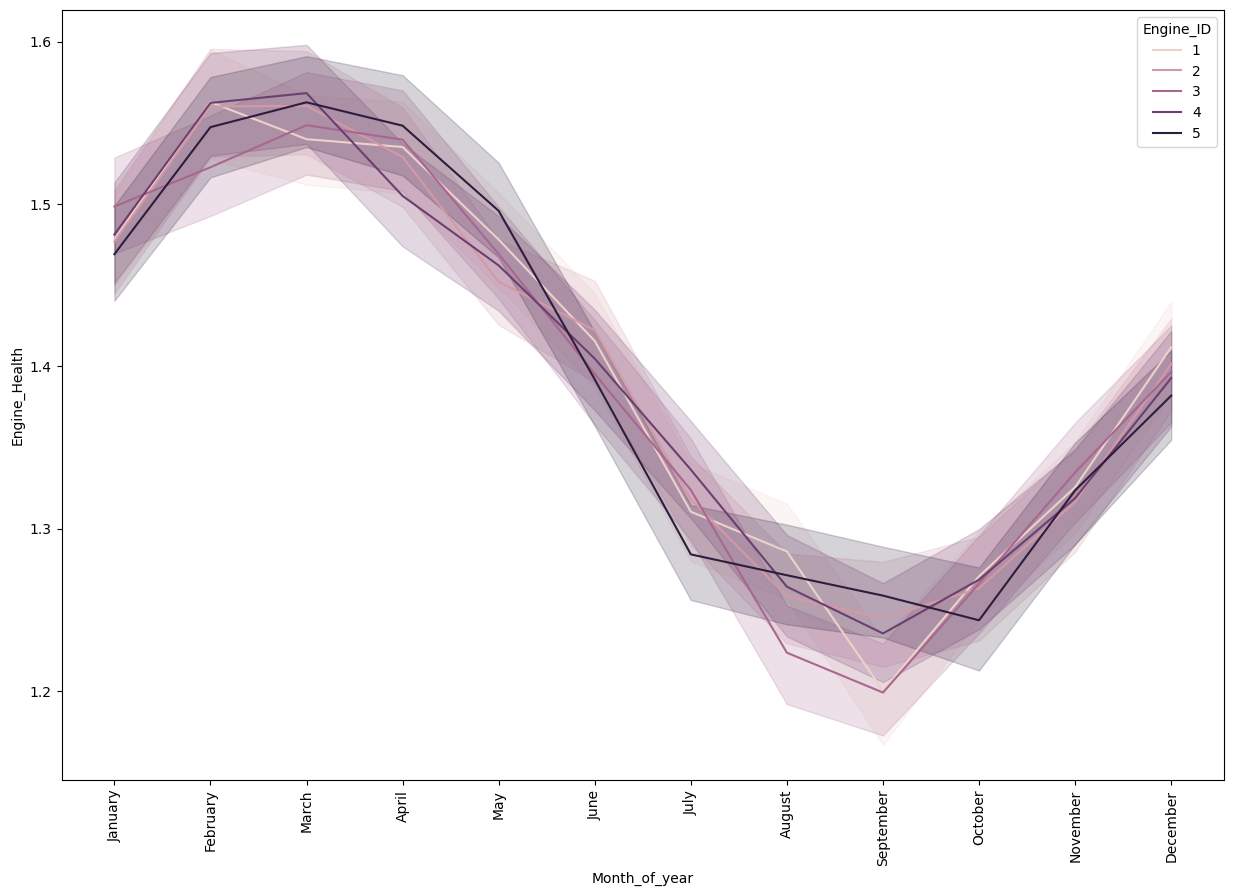

In [176]:
# Visualize time series of Engine Health and Engine Failure

plt.figure(figsize=(15,10))
sns.lineplot(x='Month_of_year',y='Engine_Health',data=engine_df, hue='Engine_ID')
plt.xticks(rotation=90)
plt.show()

### Observation

Engine health is at it's peak performance at the begining of the year and then falls drastically during the summer season. 
There is an observable increase in the Engine health performance towrds the nd of the year and this remains steady till the summer season

In [177]:
# Temperature Category
engine_df['Temperature_Category']= pd.cut(engine_df['Temperature'],bins=[0,450,550, float('inf')], labels=['low','medium','high'])
engine_df['Temperature_Category']

0        medium
6303     medium
4202     medium
2101     medium
8404     medium
          ...  
6302     medium
4201     medium
2100     medium
8403     medium
10504    medium
Name: Temperature_Category, Length: 10505, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [178]:
engine_df

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Month_of_year,Day_of_Week,Year,Hour_of_day,Temperature_Category
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0,January,Friday,2021,0,medium
6303,6303,4,2021-01-01 00:00:00,505.570432,125.381735,3076.101970,1.397839,1,January,Friday,2021,0,medium
4202,4202,3,2021-01-01 00:00:00,454.812683,115.522981,2823.933642,1.219232,0,January,Friday,2021,0,medium
2101,2101,2,2021-01-01 00:00:00,515.077480,119.945267,2790.832119,1.397576,0,January,Friday,2021,0,medium
8404,8404,5,2021-01-01 00:00:00,541.184456,119.543472,3300.346426,1.582894,0,January,Friday,2021,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,6302,3,2023-12-30 18:00:00,468.202904,103.294138,2759.012726,1.123990,1,December,Saturday,2023,18,medium
4201,4201,2,2023-12-30 18:00:00,497.909259,136.980731,3001.051616,1.506987,1,December,Saturday,2023,18,medium
2100,2100,1,2023-12-30 18:00:00,478.704044,124.621562,2825.630518,1.557776,0,December,Saturday,2023,18,medium
8403,8403,4,2023-12-30 18:00:00,484.842883,121.757481,3214.435415,1.776111,0,December,Saturday,2023,18,medium


In [179]:
engine_df['Temperature_Category'].value_counts()

Temperature_Category
medium    7407
low       1572
high      1526
Name: count, dtype: int64

In [180]:
engine_df['Day_time'] = pd.cut(engine_df['Hour_of_day'], bins=[-1, 6, 12, 18, 24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])
# Display the dataset with the new feature
engine_df
#Day_time signifies the time of day

,Unnamed: 0,Engine_ID,Timestamp,Temperature,Pressure,Rotational_Speed,Engine_Health,Engine_Failure,Month_of_year,Day_of_Week,Year,Hour_of_day,Temperature_Category,Day_time
0,0,1,2021-01-01 00:00:00,491.953274,119.945267,2801.303972,1.397576,0,January,Friday,2021,0,medium,Morning
6303,6303,4,2021-01-01 00:00:00,505.570432,125.381735,3076.101970,1.397839,1,January,Friday,2021,0,medium,Morning
4202,4202,3,2021-01-01 00:00:00,454.812683,115.522981,2823.933642,1.219232,0,January,Friday,2021,0,medium,Morning
2101,2101,2,2021-01-01 00:00:00,515.077480,119.945267,2790.832119,1.397576,0,January,Friday,2021,0,medium,Morning
8404,8404,5,2021-01-01 00:00:00,541.184456,119.543472,3300.346426,1.582894,0,January,Friday,2021,0,medium,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,6302,3,2023-12-30 18:00:00,468.202904,103.294138,2759.012726,1.123990,1,December,Saturday,2023,18,medium,Evening
4201,4201,2,2023-12-30 18:00:00,497.909259,136.980731,3001.051616,1.506987,1,December,Saturday,2023,18,medium,Evening
2100,2100,1,2023-12-30 18:00:00,478.704044,124.621562,2825.630518,1.557776,0,December,Saturday,2023,18,medium,Evening
8403,8403,4,2023-12-30 18:00:00,484.842883,121.757481,3214.435415,1.776111,0,December,Saturday,2023,18,medium,Evening


In [181]:
# Pressure to Temperature Ratio
engine_df['ptr']= engine_df['Temperature']/ engine_df['Pressure']
engine_df['ptr']
ptr=engine_df['ptr']
ptr

0        4.101481
6303     4.032249
4202     3.936989
2101     4.294271
8404     4.527093
           ...   
6302     4.532715
4201     3.634885
2100     3.841262
8403     3.982038
10504    3.803769
Name: ptr, Length: 10505, dtype: float64

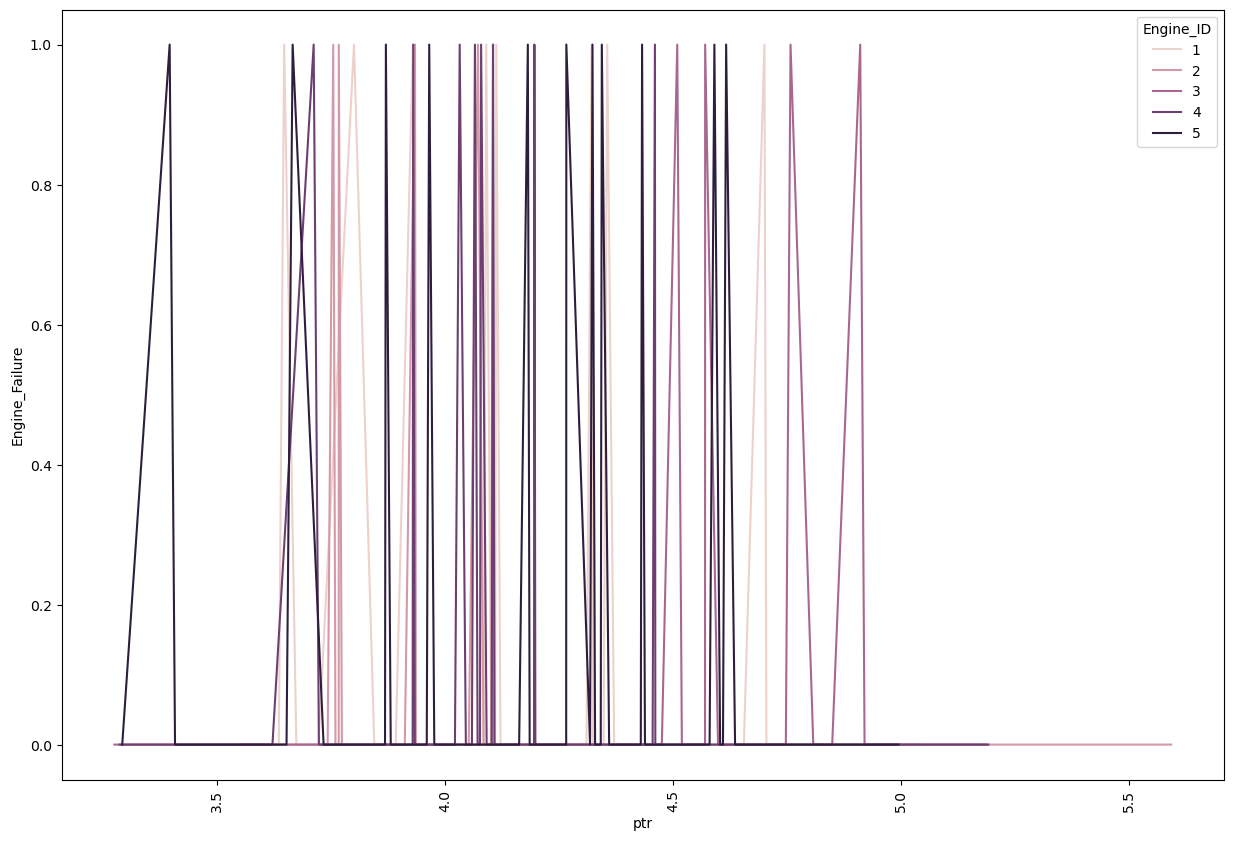

In [182]:
plt.figure(figsize=(15,10))
sns.lineplot(x='ptr',y='Engine_Failure',data=engine_df[:500], hue='Engine_ID')
plt.xticks(rotation=90)
plt.show()

In [183]:
# Feature engineering - Binning 'Hour_of_Day'


# Display the dataset with the new feature


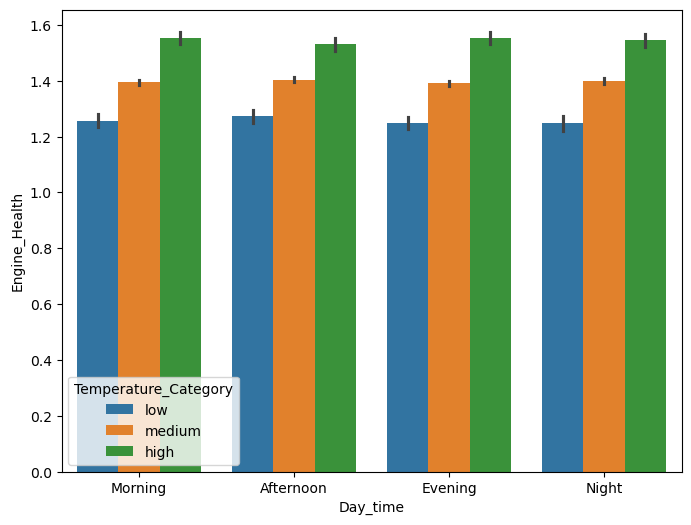

In [184]:
# Grouped Bar Chart
plt.figure(figsize=(8,6))
sns.barplot(data=engine_df,y='Engine_Health',x='Day_time',hue='Temperature_Category');

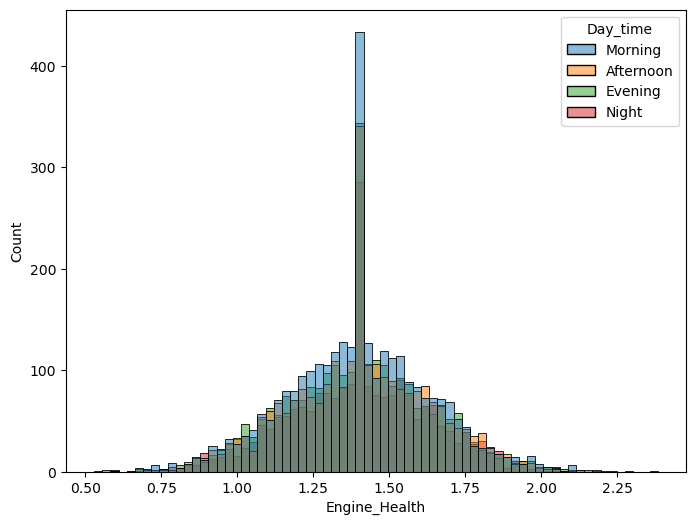

In [186]:
# Histogram
plt.figure(figsize=(8,6))

sns.histplot(x='Engine_Health', data=engine_df, hue='Day_time')

plt.show()


### Conclusion

Temperature and pressure are the main factors that affect the engine health. However, these are generic conditons. Deeper analysis are needed to ascertain on what controllable features can be accounted for.
Further machine learning algorithms will be employed for future prediction.